### The objective of this case study is to understand what's driving the total spend (Primary Card +
### Secondary card). Given the factors, predict credit limit for the new applicants

In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [226]:
Inp1=pd.read_excel(r'C:\Users\harbo\Downloads\Data_Science\Machine Learning\Case Study\Linear Regression Case Study\Data Set.xlsx')
Inp2=pd.read_excel(r'C:\Users\harbo\Downloads\Data_Science\Machine Learning\Case Study\Linear Regression Case Study\Data Dictionary.xlsx')

In [227]:
Inp1.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0


In [136]:
Inp2.columns

Index(['Numeric Variable', 'Label', 'Unnamed: 2', 'Categorical Variable',
       'Unnamed: 4', 'Label.1'],
      dtype='object')

In [137]:
Inp2.rename(columns={'Categorical Variable':'categorical_variable'},inplace=True)

In [138]:
Inp2

,Numeric Variable,Label,Unnamed: 2,categorical_variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5
...,...,...,...,...,...,...
439,NaN,NaN,NaN,response_02,0,No
440,NaN,NaN,NaN,NaN,1,Yes
441,NaN,NaN,NaN,response_03,0,No
442,NaN,NaN,NaN,NaN,1,Yes


In [139]:
#Inp1.drop(columns =['cardspent','card2spent'],inplace=True)

In [140]:
Inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [141]:
Inp2.head(2)

,Numeric Variable,Label,Unnamed: 2,categorical_variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2


In [142]:
Inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numeric Variable      132 non-null    object 
 1   Label                 132 non-null    object 
 2   Unnamed: 2            0 non-null      float64
 3   categorical_variable  84 non-null     object 
 4   Unnamed: 4            443 non-null    object 
 5   Label.1               438 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.9+ KB


In [143]:
Inp2.columns.str.strip()

Index(['Numeric Variable', 'Label', 'Unnamed: 2', 'categorical_variable',
       'Unnamed: 4', 'Label.1'],
      dtype='object')

In [144]:
Inp2.columns = Inp2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

C:\Users\harbo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [145]:
len(Inp2.categorical_variable.unique())

85

In [146]:
## Categorical Variables

Inp2.categorical_variable.unique()

array(['region', nan, 'townsize', 'gender', 'agecat', 'birthmonth',
       'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat',
       'default', 'jobsat', 'marital', 'spousedcat', 'homeown',
       'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat',
       'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus',
       'commuterail', 'commutepublic', 'commutebike', 'commutewalk',
       'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty',
       'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee',
       'cardtenure', 'cardtenurecat', 'card2', 'card2type',
       'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat',
       'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr',
       'owndvd', 'owncd

In [147]:
len(Inp2.categorical_variable.unique())

85

In [148]:
conti_vars_array = Inp1.columns.difference(Inp2.categorical_variable.unique())

In [149]:
len(conti_vars_array)

46

In [150]:
catog_vars_array = Inp2.categorical_variable.unique()

In [151]:
len(catog_vars_array)

85

In [152]:
#set(Inp2.categorical_variable.unique())-set(Inp1.columns)conti_vars_array

In [153]:
#len(Inp1.columns)

In [154]:
## Continous Variables

#Inp1.columns.difference(Inp2.categorical_variable.unique())

In [155]:
#len(Inp1.columns.difference(Inp2.categorical_variable.unique()))

##### Priliminary Hypothesis

In [156]:
## i.e. only 'nan' value of Caterorical_vars is not present in input dataset
## means out of the 85 distinct values of the categorical variable 84 are present in Input data set.
## that means out of 130 columns of input data set 84 are categorical and remaining 46 are continous variable
## Continous Vars=46,Catogarical Vars=84(Ordinal+Nominal)

##### Continous Vars=46,Catogarical Vars=84(Ordinal+Nominal)

In [157]:
conti_vars_array

Index(['age', 'card2spent', 'cardmon', 'cardspent', 'cardten', 'carvalue',
       'commutetime', 'creddebt', 'custid', 'debtinc', 'ed', 'equipmon',
       'equipten', 'hourstv', 'income', 'lncardmon', 'lncardten', 'lncreddebt',
       'lnequipmon', 'lnequipten', 'lninc', 'lnlongmon', 'lnlongten',
       'lnothdebt', 'lntollmon', 'lntollten', 'lnwiremon', 'lnwireten',
       'longmon', 'longten', 'othdebt', 'pets', 'pets_birds', 'pets_cats',
       'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish',
       'pets_small', 'reside', 'spoused', 'tenure', 'tollmon', 'tollten',
       'wiremon', 'wireten'],
      dtype='object')

In [158]:
conti_dataset = Inp1.loc[:,conti_vars_array]

In [159]:
catog_vars_array=np.delete(catog_vars_array,1)

In [160]:
catog_dataset = Inp1.loc[:,catog_vars_array]

In [161]:
conti_dataset.head(2)

,age,card2spent,cardmon,cardspent,cardten,carvalue,commutetime,creddebt,custid,debtinc,...,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten
0,20,67.80,14.25,81.66,60.0,14.3,22.0,1.200909,3964-QJWTRG-NPN,11.1,...,0,0,0,3,-1,5,29.0,161.05,0.00,0.00
1,22,34.94,16.00,42.60,610.0,6.8,29.0,1.222020,0648-AIPJSP-UVM,18.6,...,0,0,0,2,-1,39,0.0,0.00,45.65,1683.55


In [162]:
catog_dataset.head(2)

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0


In [163]:
conti_dataset['total_spent'] = conti_dataset['cardspent']+conti_dataset['card2spent']
conti_dataset.drop(columns=['cardspent','card2spent'],inplace=True)

In [164]:
conti_dataset.head(2)

,age,cardmon,cardten,carvalue,commutetime,creddebt,custid,debtinc,ed,equipmon,...,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,total_spent
0,20,14.25,60.0,14.3,22.0,1.200909,3964-QJWTRG-NPN,11.1,15,29.50,...,0,0,3,-1,5,29.0,161.05,0.00,0.00,149.46
1,22,16.00,610.0,6.8,29.0,1.222020,0648-AIPJSP-UVM,18.6,17,54.85,...,0,0,2,-1,39,0.0,0.00,45.65,1683.55,77.54


In [190]:
#conti_dataset.to_excel('conti_vars_dataset.xlsx')
catog_dataset.to_excel('catog_vars_dataset.xlsx')

#### Data Inspection

In [191]:
##pip install pandas-profiling

In [192]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [193]:
import sweetviz as sv

In [196]:
##import pandas_profiling
print(dir(sv))

['DataframeReport', 'FeatureConfig', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__license__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__title__', '__version__', 'analyze', 'compare', 'compare_intra', 'config', 'config_parser', 'dataframe_report', 'feature_config', 'from_dython', 'from_profiling_pandas', 'graph', 'graph_associations', 'graph_cat', 'graph_legend', 'graph_numeric', 'series_analyzer', 'series_analyzer_cat', 'series_analyzer_numeric', 'series_analyzer_text', 'sv_html', 'sv_html_formatters', 'sv_math', 'sv_public', 'sv_types', 'type_detection', 'utils']


In [198]:
sv_report_conti_dataset = sv.analyze(conti_dataset)
sv_report_catog_dataset = sv.analyze(catog_dataset)

In [199]:
sv_report_conti_dataset.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [200]:
##report=pandas_profiling.ProfileReport(Inp1)

In [201]:
##report.to_file('report.html')

#### Data Cleaning

#### Udfs Creation

In [202]:
### Creating Udfs for Continous Variable Summary:

def Conti_Vars_Summary(x):
    return(pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),
                    x.quantile(0.01),x.quantile(0.05),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),x.quantile(0.95),x.quantile(0.99),x.max()],
          index = ['Count','NMISS','SUM','MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P25','P50','P75','P95','P99','MAX']))

In [203]:
### Creating Udfs for Catogorical Variable Summary:

def Catog_Vars_Summary(x):
    Mode=x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([x.count(),x.isnull().sum(),Mode.iloc[0,0],Mode.iloc[0,1],
                     round(Mode.iloc[0,1]*100/x.count(),2)],
                    index=['COUNT','NMISS','MODE','FREQ','PERCENT'])

In [204]:
### Missing Value Imputation

def missing_value_imputation(x,stats='median'):
    if (x.dtypes=='int64')|(x.dtypes=='float64'):
        x=x.fillna(x.mean()) if stats=='mean' else x.fillna(x.median())
    else:
        x=x.fillna(x.mode())
    return x    

In [205]:
### Creating Dummy Variable

def create_dummies(df,col_name):
    col_dummies=pd.get_dummies(df[col_name],prefix=col_name,drop_first=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(columns=col_name,axis=1,inplace=True)
    return df

In [23]:
#Inp1.select_dtypes(exclude=['int64','float64'])

In [210]:
catog_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             5000 non-null   int64  
 1   townsize           4998 non-null   float64
 2   gender             5000 non-null   int64  
 3   agecat             5000 non-null   int64  
 4   birthmonth         5000 non-null   object 
 5   edcat              5000 non-null   int64  
 6   jobcat             5000 non-null   int64  
 7   union              5000 non-null   int64  
 8   employ             5000 non-null   int64  
 9   empcat             5000 non-null   int64  
 10  retire             5000 non-null   int64  
 11  inccat             5000 non-null   int64  
 12  default            5000 non-null   int64  
 13  jobsat             5000 non-null   int64  
 14  marital            5000 non-null   int64  
 15  spousedcat         5000 non-null   int64  
 16  homeown            5000 

In [206]:
#Inp1.loc[:,((Inp1.dtypes == 'int64')|(Inp1.dtypes == 'float64'))]

In [211]:
## Converting/Differentiating the data set into Continous and Categorical variables

#Conti_Vars=Inp1.select_dtypes(include=['int64','float64'])
#Catog_Vars=Inp1.select_dtypes(include='object')

In [31]:
## From our preliminary hypothesis and segregating of variables we MAY assume:

## Continous Vars=45,Catogarical Vars=84(Ordinal+Nominal)
## Out of 84 Categorical Variable only 2 are NOMINAL CATEGORICAL VARIABLE and 82 are ORDINAL CATEGORICAL VARIABLE.

## Continous Vars=45,Catogarical Vars=84(Ordinal+Nominal)
## Out of 84 Categorical Variable only 2 are NOMINAL CATEGORICAL VARIABLE and 82 are ORDINAL CATEGORICAL VARIABLE.

#### SUMMARIES

In [224]:
#conti_dataset.drop(columns='custid',inplace=True)

In [246]:
#conti_dataset_Summary_Report=conti_dataset.apply(Conti_Vars_Summary).T
catog_dataset_Summary_Report=catog_dataset.apply(Catog_Vars_Summary).T

In [248]:
#conti_dataset_Summary_Report
catog_dataset_Summary_Report

,COUNT,NMISS,MODE,FREQ,PERCENT
region,5000.0,0.0,5.0,1027.0,20.54
townsize,4998.0,2.0,1.0,1436.0,28.73
gender,5000.0,0.0,1.0,2518.0,50.36
agecat,5000.0,0.0,4.0,1222.0,24.44
birthmonth,5000,0,September,458,9.16
...,...,...,...,...,...
ownfax,5000.0,0.0,0.0,4106.0,82.12
news,5000.0,0.0,0.0,2637.0,52.74
response_01,5000.0,0.0,0.0,4582.0,91.64
response_02,5000.0,0.0,0.0,4351.0,87.02


In [249]:
#conti_dataset_Summary_Report.to_excel('Summary_Report_continous_vars.xlsx')
catog_dataset_Summary_Report.to_excel('Summary_Report_catagorical_vars.xlsx')

In [35]:
### Things to keep in mind while checking Continous Variable Summaries

## Check the number of missing in dependent Variable,if there is any missing than remove those records.(Above dataset have NOT)
## Check for the data types in general cases float type data is not Categorical(Check for Ordinal Categorical Variable)
## Check for the data distribution.

In [40]:
### Things to keep in mind while checking Categorical Variable Summaries

## Check for the cardinality in the variable,if the cardinality(number of unique values) is high than that variable is of NO USE 
##as we need to create dummies out of it.(and it MAY also violate the assumption no of observations>no of features)
##(WE WILL IGNORE CUSTID)

In [41]:
## the Conti_Vars has Continous Variable as well as ordinal categorical variable

In [241]:
## List of Continous Variables
#Inp1.columns.difference(Inp2.categorical_variable.unique())

#set(Inp1.columns.difference(Inp2.categorical_variable.unique()))-set(Conti_Vars_Summary_Report.index)

## Here 'custid' variable is not Continous as its dtype is object type.
#Inp1.custid

## So actual number of Continous Variables are 45 only.

#len(Inp1.columns.difference(Inp2.categorical_variable.unique()))

## Ordinal Categorical Variables

#Conti_Vars_Summary_Report.index.difference(Inp1.columns.difference(Inp2.categorical_variable.unique()))
#len(Conti_Vars_Summary_Report.index.difference(Inp1.columns.difference(Inp2.categorical_variable.unique())))

In [244]:
conti_dataset.shape

(5000, 44)

In [245]:
catog_dataset.shape

(5000, 84)

In [48]:
### that means we have:
## Continous Variables:44
## Ordinal Categorical Variables:-82
## Nominal Categorical Variables:-02(birthmonth,cust_id)

In [53]:
## Only CONTINOUS VARIABLE

#### OUTLIER IDENTIFICATION AND TREATMENT

#### IDENTIFICATION OF OUTLIERS FOR CONTINOUS VARIABLES

In [277]:
df_Continous_vars=conti_dataset

In [769]:
df_Continous_vars.head(2)

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,total_spent
0,20,14.25,14.25,14.3,22.0,1.200909,11.1,15,29.50,126.100,...,0,0,3,-1,5,29.0,161.05,0.00,0.000,149.46
1,22,16.00,16.00,6.8,29.0,1.222020,18.6,17,54.85,1244.792,...,0,0,2,-1,39,0.0,0.00,45.65,220.615,77.54


<AxesSubplot:>

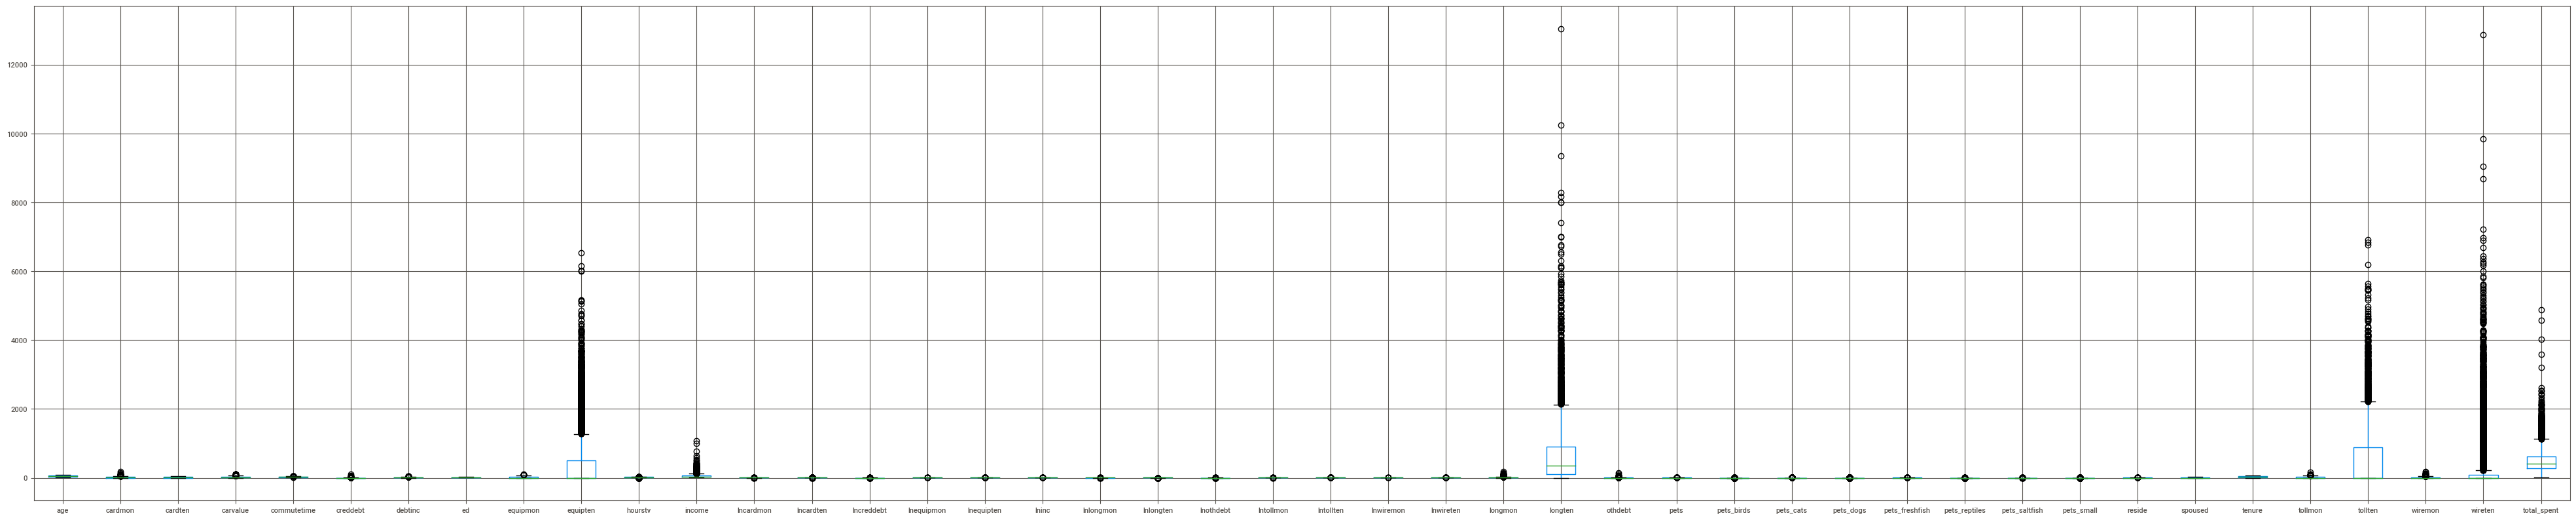

In [279]:
df_Continous_vars.boxplot(figsize=(50,10))

###### Outlier Treatment for CONTINOUS VARIABLES

<AxesSubplot:>

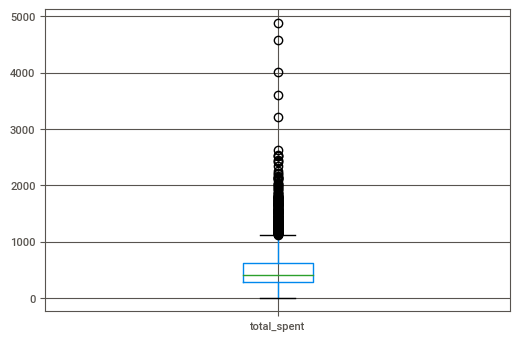

In [749]:
df_Continous_vars.iloc[:,[43]].boxplot()

In [762]:
p=df_Continous_vars.iloc[:,[43]]

In [763]:
p=p.clip(lower=p.quantile(0.01),upper=p.quantile(0.94),axis=1)

<AxesSubplot:>

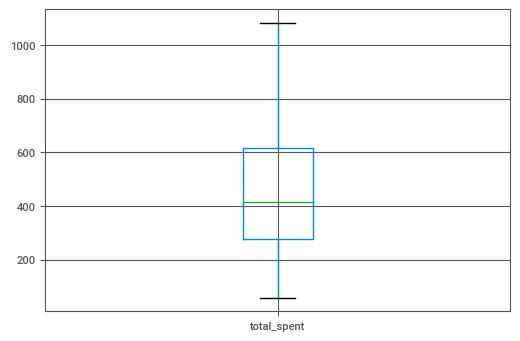

In [764]:
p.boxplot()

In [765]:
df_Continous_vars.iloc[:,[43]]=p

<AxesSubplot:>

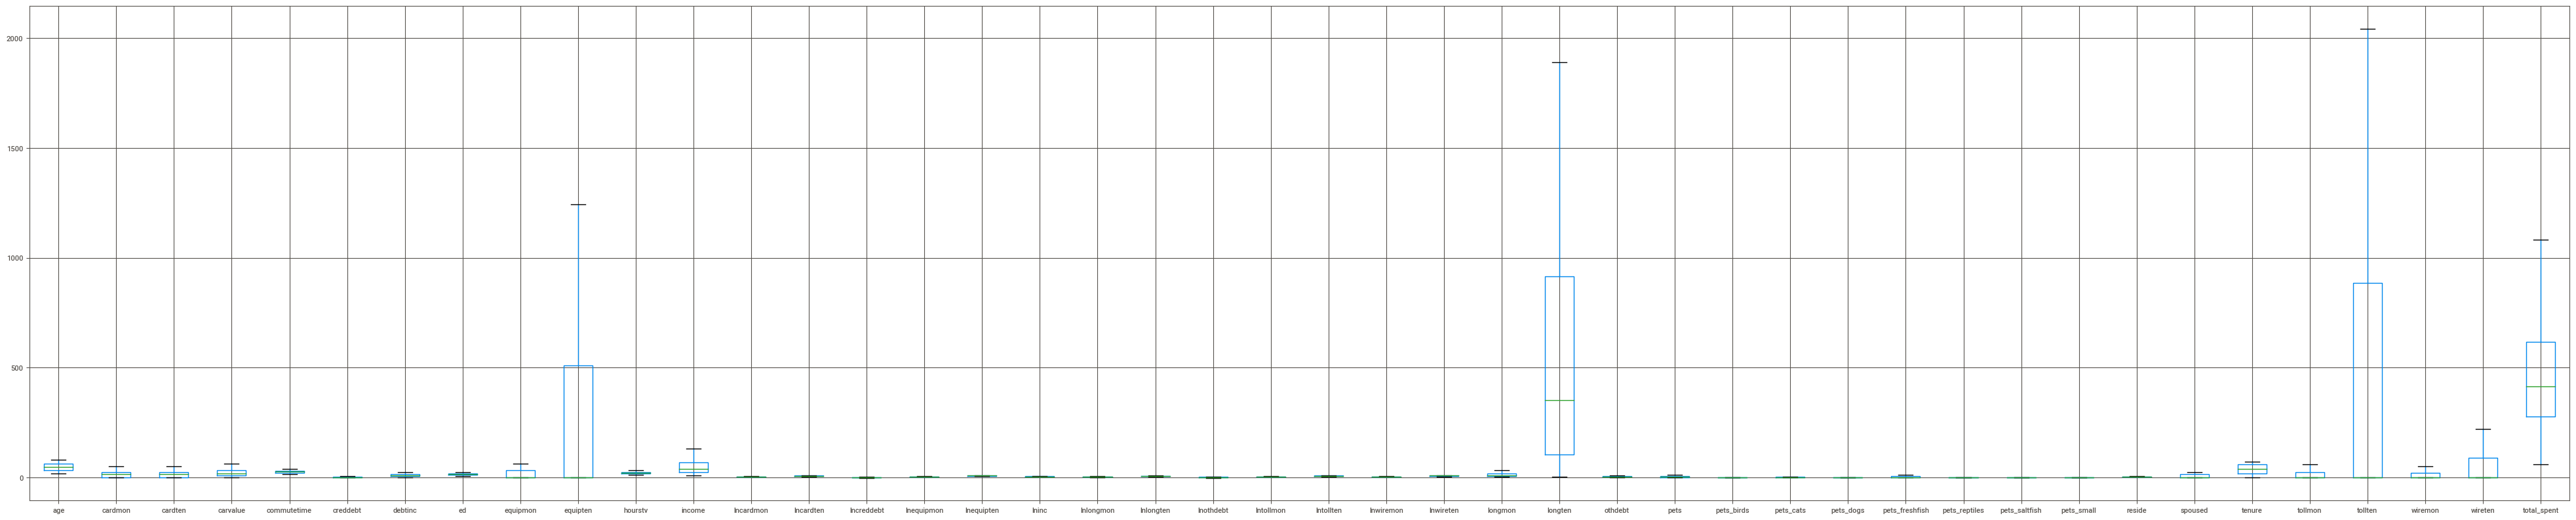

In [766]:
df_Continous_vars.boxplot(figsize=(50,10))

In [768]:
#df_Continous_vars

###### IDENTIFICATION OF OUTLIERS FOR ORDINAL CATEGORICAL VARIABLE

In [824]:
df_categorical_vars=catog_dataset

In [785]:
#df_categorical_vars.drop(columns='birthmonth',inplace=True)

In [786]:
#df_categorical_vars.boxplot(figsize=(30,10))

In [787]:
#q=df_categorical_vars.apply(lambda x : x.clip(lower=x.quantile(0.05),upper=x.quantile(0.95)))

In [788]:
#q.boxplot(figsize=(30,10))

In [789]:
#q.iloc[:,[62]].boxplot()

In [790]:
#w=q.iloc[:,[62]]

In [791]:
#w=w.clip(lower=w.quantile(0.01),upper=w.quantile(0.77),axis=1)

In [792]:
#w.boxplot()

In [793]:
#q.iloc[:,[62]]=w

In [794]:
#df_Ordinal_vars=q

In [795]:
#Continous_Vars=df_Continous_vars

In [796]:
#Ordinal_Conti_Vars=df_Ordinal_vars

In [797]:
#Ordinal_Conti_Vars.boxplot(figsize=(25,10))

In [798]:
#Continous_Vars.boxplot(figsize=(25,10))

##### MISSING VALUE IMPUTATION FOR CONTINOUS VARIABLE

In [934]:
## There are many variables that have more than 20% data missing,and we cant impute that much of data 
##so we will drop those columns.From business point of view also these are not important because the information
## which these variables are providing is also being captured by other variable.

In [800]:
df_Continous_vars=df_Continous_vars.drop(columns=['lntollmon','lntollten','lnequipmon','lnequipten','lnwiremon','lnwireten','lncardmon','lncardten'])

In [801]:
df_Continous_vars

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,total_spent
0,20,14.25,14.25,14.3,22.0,1.200909,11.1,15,29.50,126.100,...,0,0,3,-1,5,29.0,161.050,0.00,0.000,149.4600
1,22,16.00,16.00,6.8,29.0,1.222020,18.6,17,54.85,1244.792,...,0,0,2,-1,39,0.0,0.000,45.65,220.615,77.5400
2,67,23.00,23.00,18.8,24.0,0.928620,9.9,14,0.00,0.000,...,0,0,3,13,65,0.0,0.000,0.00,0.000,359.9700
3,23,21.00,21.00,8.7,38.0,0.033160,5.7,16,0.00,0.000,...,0,0,5,18,36,0.0,0.000,0.00,0.000,359.4100
4,26,17.25,17.25,10.6,32.0,0.214659,1.7,16,0.00,0.000,...,0,0,4,13,21,16.5,387.700,19.05,220.615,507.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,21.75,21.75,62.7,21.0,4.538576,8.0,10,0.00,0.000,...,0,0,1,-1,69,0.0,0.000,0.00,0.000,1082.5976
4996,51,26.25,26.25,40.0,26.0,3.336600,15.0,14,0.00,0.000,...,0,0,1,-1,30,36.5,1157.200,27.90,220.615,366.3500
4997,75,15.25,15.25,53.6,32.0,3.557520,10.8,17,0.00,0.000,...,0,0,1,-1,72,44.0,2044.157,0.00,0.000,1082.5976
4998,47,9.50,9.50,62.7,13.0,4.538576,10.8,19,29.55,1032.850,...,0,0,4,15,37,0.0,0.000,0.00,0.000,752.9500


In [802]:
df_Continous_vars=df_Continous_vars.apply(missing_value_imputation)

In [803]:
df_Continous_vars.apply(Conti_Vars_Summary).T

,Count,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P25,P50,P75,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,31.000000,47.000000,62.000000,76.000000,79.000000,79.000000
cardmon,5000.0,0.0,7.495025e+04,14.990050,13.750000,13.351370,178.259090,0.000000,0.000000,0.000000,0.000000,13.750000,22.750000,42.000000,48.750000,48.750000
cardten,5000.0,0.0,7.495025e+04,14.990050,13.750000,13.351370,178.259090,0.000000,0.000000,0.000000,0.000000,13.750000,22.750000,42.000000,48.750000,48.750000
carvalue,5000.0,0.0,1.099642e+05,21.992840,17.000000,17.947280,322.104850,-1.000000,-1.000000,-1.000000,9.200000,17.000000,31.100000,62.700000,62.700000,62.700000
commutetime,5000.0,0.0,1.264940e+05,25.298800,25.000000,5.675452,32.210761,13.000000,13.000000,16.000000,21.000000,25.000000,29.000000,35.000000,38.000000,38.000000
creddebt,5000.0,0.0,7.253812e+03,1.450762,0.926437,1.381183,1.907667,0.033160,0.033166,0.101088,0.385520,0.926437,2.063820,4.538576,4.538576,4.538576
debtinc,5000.0,0.0,4.914830e+04,9.829660,8.800000,6.011521,36.138386,0.700000,0.700000,1.900000,5.100000,8.800000,13.600000,22.200000,24.700000,24.700000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,10.765504,6.000000,8.000000,9.000000,12.000000,14.000000,17.000000,20.000000,21.000000,23.000000
equipmon,5000.0,0.0,6.454358e+04,12.908715,0.000000,18.955975,359.328975,0.000000,0.000000,0.000000,0.000000,0.000000,30.800000,49.052500,63.300005,63.300500
equipten,5000.0,0.0,1.485066e+06,297.013190,0.000000,486.711172,236887.764987,0.000000,0.000000,0.000000,0.000000,0.000000,510.162500,1244.792000,1244.792000,1244.792000


##### MISSING VALUE IMPUTATION FOR CATEGORICAL VARIABLE

In [820]:
df_categorical_vars.apply(Conti_Vars_Summary).T

,Count,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P25,P50,P75,P95,P99,MAX
region,5000.0,0.0,15007.0,3.001400,3.0,1.421760,2.021402,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0
townsize,4998.0,2.0,13431.0,2.687275,3.0,1.425925,2.033262,1.0,1.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0
gender,5000.0,0.0,2518.0,0.503600,1.0,0.500037,0.250037,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
agecat,5000.0,0.0,21194.0,4.238800,4.0,1.308785,1.712917,2.0,2.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0
edcat,5000.0,0.0,13360.0,2.672000,2.0,1.211738,1.468310,1.0,1.0,1.0,2.0,2.0,4.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ownfax,5000.0,0.0,894.0,0.178800,0.0,0.383223,0.146860,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
news,5000.0,0.0,2363.0,0.472600,0.0,0.499299,0.249299,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
response_01,5000.0,0.0,418.0,0.083600,0.0,0.276815,0.076626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
response_02,5000.0,0.0,649.0,0.129800,0.0,0.336117,0.112975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [942]:
##stats='median'
#df_categorical_vars=df_categorical_vars.apply(missing_value_imputation)

In [832]:
df_categorical_vars['townsize'] = df_categorical_vars.townsize.fillna(df_categorical_vars.townsize.mode())

In [828]:
#finding the element in the feature which is missing
np.where(df_categorical_vars.townsize.isna() == True)

(array([ 961, 2731], dtype=int64),)

In [833]:
# finding the mode value
df_categorical_vars.townsize.mode()

0    1.0
dtype: float64

In [849]:
#df_categorical_vars.townsize.iloc[2731:2732] = 1

In [847]:
df_categorical_vars

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,2,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,2,0,16,5,0,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,2,0,0,1,0,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,2,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,24,5,0,...,1,0,0,0,0,0,1,0,0,0
4996,3,3.0,0,5,2,1,0,6,3,0,...,1,0,0,0,0,0,0,0,0,0
4997,4,5.0,0,6,4,1,0,24,5,0,...,1,1,0,0,0,0,1,0,0,0
4998,1,1.0,0,4,4,2,0,3,2,0,...,1,0,1,1,1,0,1,0,0,0


In [848]:
df_categorical_vars.apply(Conti_Vars_Summary).T

,Count,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P25,P50,P75,P95,P99,MAX
region,5000.0,0.0,15007.0,3.0014,3.0,1.421760,2.021402,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0
townsize,5000.0,0.0,13433.0,2.6866,3.0,1.426039,2.033587,1.0,1.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0
gender,5000.0,0.0,2518.0,0.5036,1.0,0.500037,0.250037,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
agecat,5000.0,0.0,21194.0,4.2388,4.0,1.308785,1.712917,2.0,2.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0
edcat,5000.0,0.0,13360.0,2.6720,2.0,1.211738,1.468310,1.0,1.0,1.0,2.0,2.0,4.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ownfax,5000.0,0.0,894.0,0.1788,0.0,0.383223,0.146860,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
news,5000.0,0.0,2363.0,0.4726,0.0,0.499299,0.249299,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
response_01,5000.0,0.0,418.0,0.0836,0.0,0.276815,0.076626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
response_02,5000.0,0.0,649.0,0.1298,0.0,0.336117,0.112975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


###### GET DUMMIES

In [850]:
## no need to create dummy as there are no important nominal categorical variables

###### FINAL DATASET FOR MODELLING

In [853]:
df_Continous_vars.head(2)

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,total_spent
0,20,14.25,14.25,14.3,22.0,1.200909,11.1,15,29.50,126.100,...,0,0,3,-1,5,29.0,161.05,0.00,0.000,149.46
1,22,16.00,16.00,6.8,29.0,1.222020,18.6,17,54.85,1244.792,...,0,0,2,-1,39,0.0,0.00,45.65,220.615,77.54


In [854]:
df_categorical_vars.head(2)

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,2,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0


In [855]:
df_Credit_Card=pd.concat([df_Continous_vars,df_categorical_vars],axis=1)

In [856]:
df_Credit_Card

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,20,14.25,14.25,14.3,22.0,1.200909,11.1,15,29.50,126.100,...,0,0,0,1,1,0,0,0,1,0
1,22,16.00,16.00,6.8,29.0,1.222020,18.6,17,54.85,1244.792,...,1,1,1,1,1,1,1,0,0,0
2,67,23.00,23.00,18.8,24.0,0.928620,9.9,14,0.00,0.000,...,1,0,0,0,0,0,1,0,0,0
3,23,21.00,21.00,8.7,38.0,0.033160,5.7,16,0.00,0.000,...,1,0,1,1,1,0,1,1,0,0
4,26,17.25,17.25,10.6,32.0,0.214659,1.7,16,0.00,0.000,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,21.75,21.75,62.7,21.0,4.538576,8.0,10,0.00,0.000,...,1,0,0,0,0,0,1,0,0,0
4996,51,26.25,26.25,40.0,26.0,3.336600,15.0,14,0.00,0.000,...,1,0,0,0,0,0,0,0,0,0
4997,75,15.25,15.25,53.6,32.0,3.557520,10.8,17,0.00,0.000,...,1,1,0,0,0,0,1,0,0,0
4998,47,9.50,9.50,62.7,13.0,4.538576,10.8,19,29.55,1032.850,...,1,0,1,1,1,0,1,0,0,0


In [857]:
df_Credit_Card.to_excel('final_dataset_for_model_building.xlsx')

In [858]:
## The Final data set has 5000 observations and 119 columns

#### ASSUMPTION CHECK

In [859]:
## assumption checks for linear regression before model building

## ideally all the features should be normally distributed but if that is not possible than at leasy dependent variable
## should be

In [860]:
df_Credit_Card

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,20,14.25,14.25,14.3,22.0,1.200909,11.1,15,29.50,126.100,...,0,0,0,1,1,0,0,0,1,0
1,22,16.00,16.00,6.8,29.0,1.222020,18.6,17,54.85,1244.792,...,1,1,1,1,1,1,1,0,0,0
2,67,23.00,23.00,18.8,24.0,0.928620,9.9,14,0.00,0.000,...,1,0,0,0,0,0,1,0,0,0
3,23,21.00,21.00,8.7,38.0,0.033160,5.7,16,0.00,0.000,...,1,0,1,1,1,0,1,1,0,0
4,26,17.25,17.25,10.6,32.0,0.214659,1.7,16,0.00,0.000,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,21.75,21.75,62.7,21.0,4.538576,8.0,10,0.00,0.000,...,1,0,0,0,0,0,1,0,0,0
4996,51,26.25,26.25,40.0,26.0,3.336600,15.0,14,0.00,0.000,...,1,0,0,0,0,0,0,0,0,0
4997,75,15.25,15.25,53.6,32.0,3.557520,10.8,17,0.00,0.000,...,1,1,0,0,0,0,1,0,0,0
4998,47,9.50,9.50,62.7,13.0,4.538576,10.8,19,29.55,1032.850,...,1,0,1,1,1,0,1,0,0,0


<AxesSubplot:>

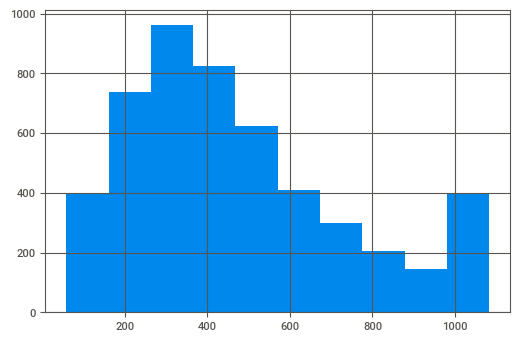

In [861]:
df_Credit_Card.total_spent.hist()

In [863]:
df_Credit_Card.total_spent.skew()

0.8110994549728349

In [864]:
df_Credit_Card['ln_total_spent']=np.log(df_Credit_Card.total_spent)

<AxesSubplot:>

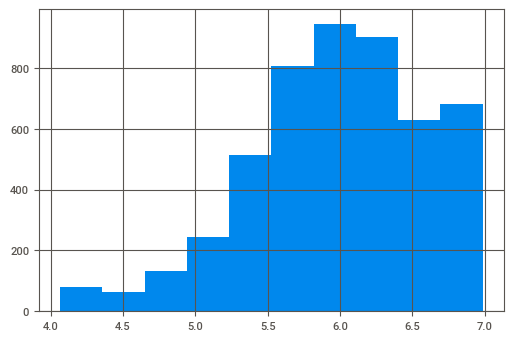

In [865]:
df_Credit_Card.ln_total_spent.hist()

In [866]:
df_Credit_Card.ln_total_spent.skew()

-0.5306973358045146

In [867]:
## As there are many 0 values in the variablecard2spend thats why we will add one to each 
##else when we take the log transformation these 0 will turn into -Inf.

#### SPLITING THE DATA

In [868]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [869]:
feature_column=df_Credit_Card.columns.difference(['total_spent','ln_total_spent'])

In [877]:
##sklearn related train test split

train_x,test_x,train_y,test_y=train_test_split(df_Credit_Card[feature_column],
                                               df_Credit_Card['ln_total_spent'],test_size=0.3,random_state=1234)

In [878]:
## Method 2

train,test=train_test_split(df_Credit_Card,test_size=0.3,random_state=1234)

In [879]:
train

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,ln_total_spent
4735,58,10.00,10.00,57.6,27.0,1.345604,22.9,13,0.0,0.000,...,0,1,0,0,0,1,0,0,0,6.987119
1796,68,36.50,36.50,58.9,26.0,1.664300,5.5,12,0.0,0.000,...,1,1,1,0,1,1,0,0,0,5.855101
479,37,16.75,16.75,62.7,21.0,4.538576,12.5,21,42.8,314.400,...,1,1,1,1,1,0,0,0,0,5.765567
2524,29,15.75,15.75,16.6,22.0,0.662752,14.9,21,33.3,477.850,...,0,1,1,1,0,0,0,0,0,6.005318
1565,35,0.00,0.00,16.0,27.0,1.961256,7.6,14,0.0,0.000,...,0,0,0,0,0,0,0,0,0,5.001527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,20,0.00,0.00,23.5,35.0,1.459248,11.2,14,0.0,0.000,...,0,0,1,1,0,0,0,0,0,5.882040
3276,52,10.00,10.00,15.2,27.0,0.056347,6.7,7,0.0,0.000,...,0,1,0,0,0,0,0,0,0,5.083576
1318,39,8.00,8.00,16.3,28.0,0.344318,4.1,17,0.0,0.000,...,0,0,1,0,0,1,0,0,0,6.550952
723,40,0.00,0.00,-1.0,24.0,1.443618,13.8,9,0.0,0.000,...,0,0,0,0,0,0,0,0,0,5.524297


#### SIGNIFICANCE OF A VARIABLE(F REGRESSION)

In [881]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [882]:
from sklearn.feature_selection import f_regression
features=train_x
target=train_y
F_values,p_values=f_regression(features,target)

In [883]:
f_reg_result=pd.concat([pd.Series(features.columns),pd.Series(F_values),pd.Series(p_values)],axis=1)

In [884]:
f_reg_result.columns=['Feature','F_value','p_value']

In [885]:
f_reg_result

,Feature,F_value,p_value
0,active,0.020609,0.885857
1,address,10.718884,0.001071
2,addresscat,23.243530,0.000001
3,age,0.202004,0.653136
4,agecat,3.597869,0.057936
...,...,...,...
113,voice,5.833584,0.015774
114,vote,12.462803,0.000420
115,wireless,16.973479,0.000039
116,wiremon,23.231675,0.000001


In [36]:
##f_reg_result2=f_reg_result.iloc[np.where(f_reg_result.p_value.isnull())]

In [49]:
##list(f_reg_result2.Feature)

In [886]:
f_reg_result1=f_reg_result.iloc[np.where(f_reg_result.p_value<0.1)]

In [887]:
f_reg_result1

,Feature,F_value,p_value
1,address,10.718884,0.001071
2,addresscat,23.243530,0.000001
4,agecat,3.597869,0.057936
5,bfast,3.197646,0.073831
7,callid,10.476075,0.001221
...,...,...,...
113,voice,5.833584,0.015774
114,vote,12.462803,0.000420
115,wireless,16.973479,0.000039
116,wiremon,23.231675,0.000001


In [888]:
f_columns=list(f_reg_result1.Feature)

In [889]:
f_columns

['address',
 'addresscat',
 'agecat',
 'bfast',
 'callid',
 'callwait',
 'carcatvalue',
 'card',
 'card2',
 'card2tenure',
 'card2tenurecat',
 'cardtenure',
 'cardtenurecat',
 'carown',
 'carvalue',
 'commutebike',
 'confer',
 'creddebt',
 'ebill',
 'ed',
 'edcat',
 'empcat',
 'employ',
 'equip',
 'equipmon',
 'equipten',
 'forward',
 'gender',
 'homeown',
 'hourstv',
 'inccat',
 'income',
 'internet',
 'jobsat',
 'lncreddebt',
 'lninc',
 'lnlongmon',
 'lnlongten',
 'lnothdebt',
 'longmon',
 'longten',
 'multline',
 'news',
 'othdebt',
 'owncd',
 'owndvd',
 'ownfax',
 'owngame',
 'ownipod',
 'ownpc',
 'ownpda',
 'owntv',
 'ownvcr',
 'pager',
 'polcontrib',
 'region',
 'response_03',
 'retire',
 'spoused',
 'spousedcat',
 'tenure',
 'tollfree',
 'tollmon',
 'tollten',
 'voice',
 'vote',
 'wireless',
 'wiremon',
 'wireten']

In [890]:
len(f_columns)

69

In [891]:
##f_reg_result.iloc[np.where(f_reg_result.p_value>0.1)]

#### Checking For MultiCollinearity (Variance Inflation Factor)

In [892]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [906]:
?variance_inflation_factor

#### Linear Regression Equation

In [897]:
model_param='ln_total_spent~'+'+'.join(f_columns)

In [898]:
model_param

'ln_total_spent~address+addresscat+agecat+bfast+callid+callwait+carcatvalue+card+card2+card2tenure+card2tenurecat+cardtenure+cardtenurecat+carown+carvalue+commutebike+confer+creddebt+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hourstv+inccat+income+internet+jobsat+lncreddebt+lninc+lnlongmon+lnlongten+lnothdebt+longmon+longten+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+region+response_03+retire+spoused+spousedcat+tenure+tollfree+tollmon+tollten+voice+vote+wireless+wiremon+wireten'

In [899]:
model_param='''ln_total_spent~address+addresscat+agecat+bfast+callid+callwait+carcatvalue+card+card2+card2tenure+card2tenurecat+
                cardtenure+cardtenurecat+carown+carvalue+commutebike+confer+creddebt+ebill+ed+edcat+empcat+employ+equip+
                equipmon+equipten+forward+gender+homeown+hourstv+inccat+income+internet+jobsat+lncreddebt+lninc+lnlongmon+
                lnlongten+lnothdebt+longmon+longten+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+
                owntv+ownvcr+pager+polcontrib+region+response_03+retire+spoused+spousedcat+tenure+tollfree+tollmon+tollten+
                voice+vote+wireless+wiremon+wireten''' 

In [ ]:
model_param='''ln_total_spent~bfast+callid+callwait+card+card2+
                carown+commutebike+confer+ebill+
            forward+gender+homeown+hourstv+internet+jobsat+lncreddebt+multline+news+othdebt+owncd+owndvd+ownfax+owngame+
            ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+region+response_03+retire+
            tollfree+voice+vote'''

In [900]:
y, X = dmatrices(model_param,train,return_type='dataframe')

In [901]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF_ Factor']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

In [902]:
vif1=vif.round(1)

In [910]:
#np.where(vif1.VIF_Factor<5)

In [912]:
#vif1.head(2)

In [909]:
vif1.tail(15)

,Features,VIF_ Factor
55,polcontrib,1.0
56,region,1.0
57,response_03,1.0
58,retire,3.4
59,spoused,35.0
60,spousedcat,35.2
61,tenure,35.6
62,tollfree,5.4
63,tollmon,12.3
64,tollten,8.4


In [402]:
## These are the 40 Variables.we can check the accuracy by creating the linear model

In [404]:
#lm1=smf.ols('''ln_cardspent~address+agecat+birthmonth_December+callcard+callid+callwait+carcatvalue+card+card2+
               #card2spent+cardten+carown+confer+ebill+ed+
               #employ+equipten+forward+gender+homeown+hourstv+internet+jobsat+
               #lncreddebt+lninc+lnlongmon+lnothdebt+multline+news+owngame+ownipod+ownpc+
               #spousedcat+tollfree+tollten+voice+vote+wireten''',train).fit()

In [926]:
lm1=smf.ols('''ln_total_spent~address+addresscat+agecat+bfast+callid+callwait+carcatvalue+card+card2+card2tenure+card2tenurecat+
                cardtenure+cardtenurecat+carown+carvalue+commutebike+confer+creddebt+ebill+ed+edcat+empcat+employ+equip+
                equipmon+equipten+forward+gender+homeown+hourstv+inccat+income+internet+jobsat+lncreddebt+lninc+lnlongmon+
                lnlongten+lnothdebt+longmon+longten+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+
                owntv+ownvcr+pager+polcontrib+region+response_03+retire+spoused+spousedcat+tenure+tollfree+tollmon+tollten+
                voice+vote+wireless+wiremon+wireten''',train).fit()

In [927]:
#lm1=smf.ols(model_param,train).fit()

In [928]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spent   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     18.33
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          9.46e-183
Time:                        10:33:12   Log-Likelihood:                -2745.0
No. Observations:                3500   AIC:                             5630.
Df Residuals:                    3430   BIC:                             6061.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.5264      0.208     26.